# Aim:  predict which customers the company is less likely to retain

In [85]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas.testing as tm
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.utils import resample,shuffle

In [139]:
# Importing the dataset
df = pd.read_csv('o2_demo_telco_churn.csv')
df

,custID,Gender,IsRetired,IsMarried,HasChildren,TotalMonthsInContract,HasPhone,ConnectionType,HasAntivirusSubscription,HasCloudBackUp,...,HasTVPackage,HasMoviePackage,PayTerm,OnlineStatements,PreferredPaymentType,MonthlyBill,TotalFees,MonthlySpend,RetentionCheck,Retention
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,22.40,Yes,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,56.82,Yes,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,54.93,No,No
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,35.24,Yes,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,70.16,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,90.43,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,99.85,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,30.13,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,77.93,No,No


In [140]:
# Understanding the dataset
print(df.describe())

         IsRetired  TotalMonthsInContract  MonthlyBill  MonthlySpend
count  7043.000000            7043.000000  7043.000000   7043.000000
mean      0.162147              32.371149    64.761692     64.813767
std       0.368612              24.559481    30.090047     30.261963
min       0.000000               0.000000    18.250000      6.780000
25%       0.000000               9.000000    35.500000     36.020000
50%       0.000000              29.000000    70.350000     70.900000
75%       0.000000              55.000000    89.850000     89.925000
max       1.000000              72.000000   118.750000    124.930000


In [141]:
df.head()

,custID,Gender,IsRetired,IsMarried,HasChildren,TotalMonthsInContract,HasPhone,ConnectionType,HasAntivirusSubscription,HasCloudBackUp,...,HasTVPackage,HasMoviePackage,PayTerm,OnlineStatements,PreferredPaymentType,MonthlyBill,TotalFees,MonthlySpend,RetentionCheck,Retention
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,22.40,Yes,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,56.82,Yes,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,54.93,No,No
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,35.24,Yes,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,70.16,Yes,No


In [142]:
# checking missing values
df.isna().sum()

custID                      0
Gender                      0
IsRetired                   0
IsMarried                   0
HasChildren                 0
TotalMonthsInContract       0
HasPhone                    0
ConnectionType              0
HasAntivirusSubscription    0
HasCloudBackUp              0
HasInsurance                0
HasHelpdeskPrivileges       0
HasTVPackage                0
HasMoviePackage             0
PayTerm                     0
OnlineStatements            0
PreferredPaymentType        0
MonthlyBill                 0
TotalFees                   0
MonthlySpend                0
RetentionCheck              0
Retention                   0
dtype: int64

In [143]:
# Datatypes
df.dtypes

custID                       object
Gender                       object
IsRetired                     int64
IsMarried                    object
HasChildren                  object
TotalMonthsInContract         int64
HasPhone                     object
ConnectionType               object
HasAntivirusSubscription     object
HasCloudBackUp               object
HasInsurance                 object
HasHelpdeskPrivileges        object
HasTVPackage                 object
HasMoviePackage              object
PayTerm                      object
OnlineStatements             object
PreferredPaymentType         object
MonthlyBill                 float64
TotalFees                    object
MonthlySpend                float64
RetentionCheck               object
Retention                    object
dtype: object

## Data Analysis

Text(0.5, 1.0, 'MonthlySpend Boxplot')

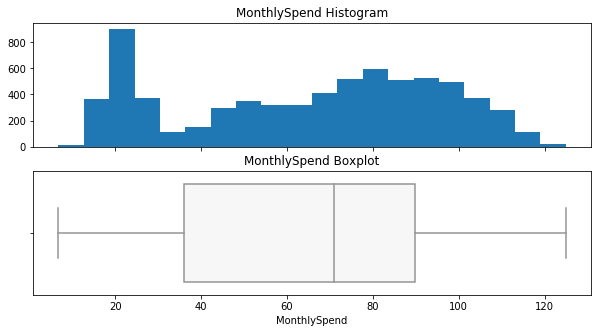

In [144]:
# Monthly Spend
import matplotlib.pyplot as plt

#ploting distribution of MonthlySpend
df_viz=df.copy()

import seaborn as sns
fig, ax = plt.subplots(2, sharex=True,figsize= (10,5))
ax[0].get_xaxis().get_major_formatter().set_scientific(False) #turning off scientific notation
#histogram
ax[0].hist(df_viz['MonthlySpend'], bins = 20)
#boxplot
sns.boxplot(df_viz.MonthlySpend, palette="PRGn")
ax[0].grid(False)
ax[1].grid(False)
#setting titles
ax[0].set_title('MonthlySpend Histogram')
ax[1].set_title('MonthlySpend Boxplot')

Text(0.5, 1.0, 'MonthlyBill Boxplot')

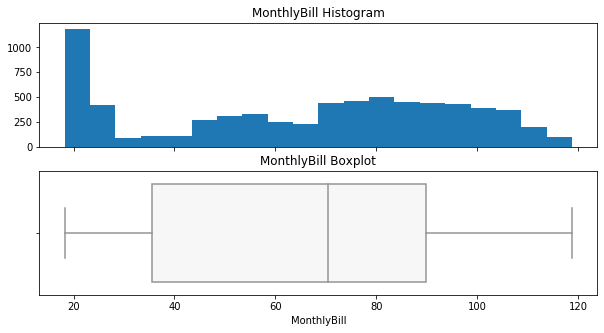

In [145]:
#Monthly bill
import matplotlib.pyplot as plt

#ploting distribution of MonthlyBill
df_viz=df.copy()

import seaborn as sns
fig, ax = plt.subplots(2, sharex=True,figsize= (10,5))
ax[0].get_xaxis().get_major_formatter().set_scientific(False) #turning off scientific notation
#histogram
ax[0].hist(df_viz['MonthlyBill'], bins = 20)
#boxplot
sns.boxplot(df_viz.MonthlyBill, palette="PRGn")
ax[0].grid(False)
ax[1].grid(False)
#setting titles
ax[0].set_title('MonthlyBill Histogram')
ax[1].set_title('MonthlyBill Boxplot')

Text(0.5, 1.0, 'TotalMonthsInContract Boxplot')

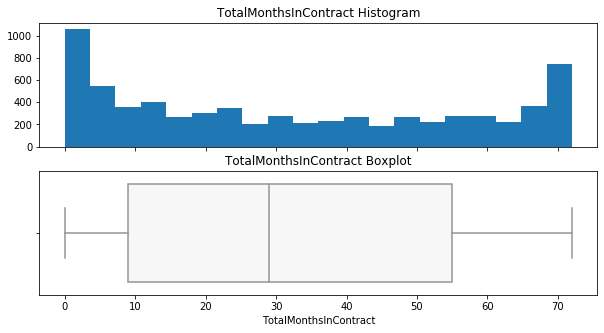

In [146]:
#Total months in contract
import matplotlib.pyplot as plt

#ploting distribution of TotalMonthsInContract
df_viz=df.copy()

import seaborn as sns
fig, ax = plt.subplots(2, sharex=True,figsize= (10,5))
ax[0].get_xaxis().get_major_formatter().set_scientific(False) #turning off scientific notation
#histogram
ax[0].hist(df_viz['TotalMonthsInContract'], bins = 20)
#boxplot
sns.boxplot(df_viz.TotalMonthsInContract, palette="PRGn")
ax[0].grid(False)
ax[1].grid(False)
#setting titles
ax[0].set_title('TotalMonthsInContract Histogram')
ax[1].set_title('TotalMonthsInContract Boxplot')

In [147]:
# Identifying the unique values
print(df.Gender.unique())
print("\n")

print(df.IsMarried.unique())
print("\n")

print(df.HasChildren.unique())
print("\n")

print(df.HasPhone.unique())
print("\n")

print(df.ConnectionType.unique())
print("\n")

print(df.HasAntivirusSubscription.unique())
print("\n")

print(df.HasInsurance.unique())
print("\n")

print(df.HasHelpdeskPrivileges.unique())
print("\n")

print(df.HasMoviePackage.unique())
print("\n")

print(df.PayTerm.unique())
print("\n")

print(df.OnlineStatements.unique())
print("\n")

print(df.PreferredPaymentType.unique())
print("\n")

print(df.RetentionCheck.unique())
print("\n")

print(df.Retention.unique())
print("\n")

['Female' 'Male']


['Yes' 'No']


['No' 'Yes']


['No' 'Yes']


['DSL' 'Fiber optic' 'No']


['No' 'Yes' 'No internet service']


['No' 'Yes' 'No internet service']


['No' 'Yes' 'No internet service']


['No' 'Yes' 'No internet service']


['Month-to-month' 'One year' 'Two year']


['Yes' 'No']


['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


['Yes' 'No']


['Yes' 'No']




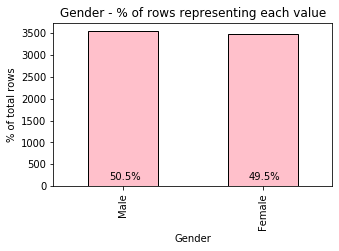

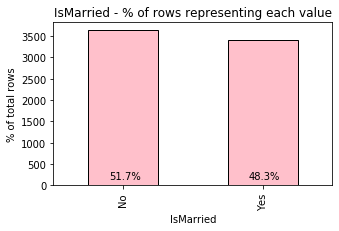

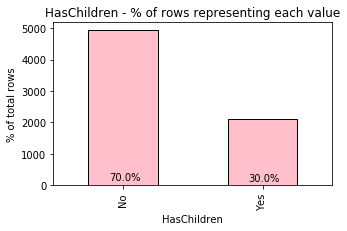

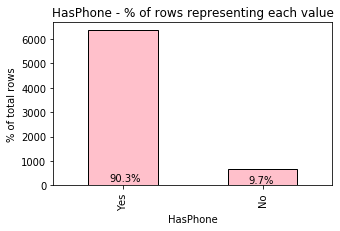

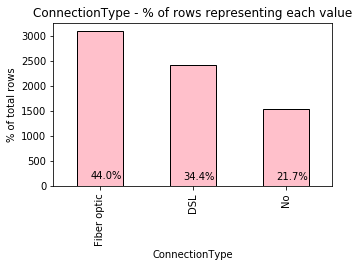

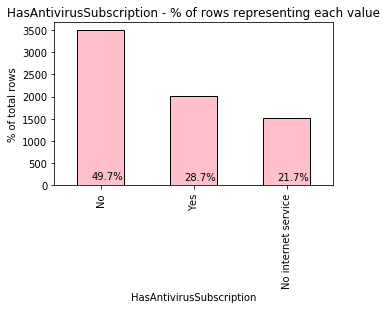

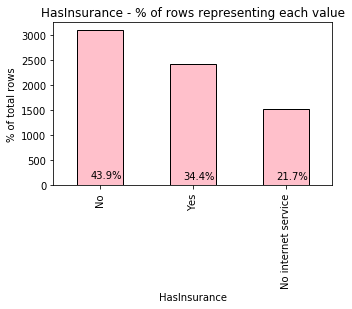

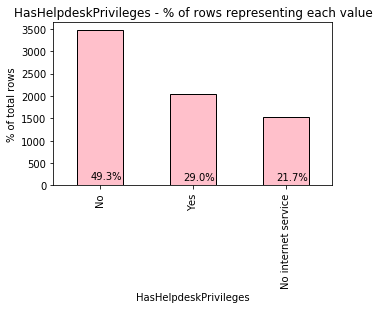

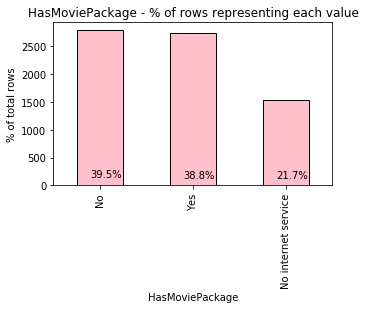

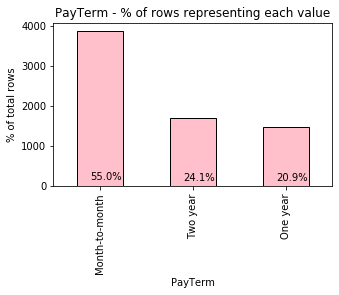

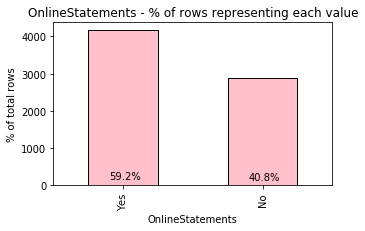

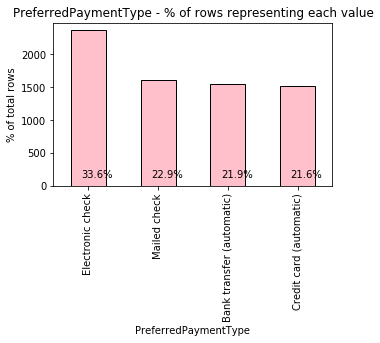

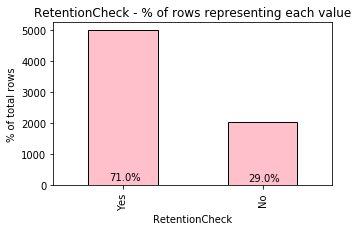

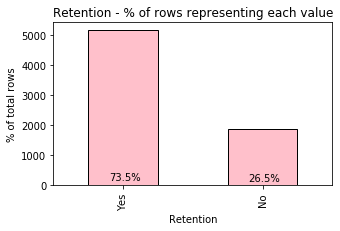

In [149]:
#Understanding the spread of the data of Categorical variables
nominal_cols= ['Gender','IsMarried','HasChildren','HasPhone','ConnectionType','HasAntivirusSubscription','HasInsurance',
               'HasHelpdeskPrivileges','HasMoviePackage','PayTerm','OnlineStatements','PreferredPaymentType','RetentionCheck','Retention']
for variable in nominal_cols:
    #get all unique values
    unique_vals_list = df[variable].unique()

for col in nominal_cols:
    values = df[col].value_counts()/df[col].value_counts().sum()*100
    fig, ax = plt.subplots(figsize= (5,3))
    df[col].value_counts().plot(kind='bar', color = 'pink', edgecolor = 'black')
    plt.xlabel(col)
    plt.ylabel('% of total rows')
    plt.title(col+' - % of rows representing each value')
    for i, v in enumerate(values):
        ax.text(i-.10, 
                  v+100, 
                  str(round(values[i],1))+'%', 
                  fontsize=10, 
                  color='black')


In [96]:
df.dtypes

custID                       object
Gender                       object
IsRetired                     int64
IsMarried                    object
HasChildren                  object
TotalMonthsInContract         int64
HasPhone                     object
ConnectionType               object
HasAntivirusSubscription     object
HasCloudBackUp               object
HasInsurance                 object
HasHelpdeskPrivileges        object
HasTVPackage                 object
HasMoviePackage              object
PayTerm                      object
OnlineStatements             object
PreferredPaymentType         object
MonthlyBill                 float64
TotalFees                    object
MonthlySpend                float64
RetentionCheck               object
Retention                    object
dtype: object

In [97]:
#Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(df['Gender'].unique()))
list(le.classes_)
df['Gender']=list(le.transform(df['Gender'].tolist()))

le.fit(list(df['IsMarried'].unique()))
list(le.classes_)
df['IsMarried']=list(le.transform(df['IsMarried'].tolist()))

le.fit(list(df['HasChildren'].unique()))
list(le.classes_)
df['HasChildren']=list(le.transform(df['HasChildren'].tolist()))

le.fit(list(df['HasPhone'].unique()))
list(le.classes_)
df['HasPhone']=list(le.transform(df['HasPhone'].tolist()))

le.fit(list(df['ConnectionType'].unique()))
list(le.classes_)
df['ConnectionType']=list(le.transform(df['ConnectionType'].tolist()))

le.fit(list(df['HasAntivirusSubscription'].unique()))
list(le.classes_)
df['HasAntivirusSubscription']=list(le.transform(df['HasAntivirusSubscription'].tolist()))

le.fit(list(df['HasCloudBackUp'].unique()))
list(le.classes_)
df['HasCloudBackUp']=list(le.transform(df['HasCloudBackUp'].tolist()))

le.fit(list(df['HasInsurance'].unique()))
list(le.classes_)
df['HasInsurance']=list(le.transform(df['HasInsurance'].tolist()))

le.fit(list(df['HasHelpdeskPrivileges'].unique()))
list(le.classes_)
df['HasHelpdeskPrivileges']=list(le.transform(df['HasHelpdeskPrivileges'].tolist()))

le.fit(list(df['HasTVPackage'].unique()))
list(le.classes_)
df['HasTVPackage']=list(le.transform(df['HasTVPackage'].tolist()))

le.fit(list(df['HasMoviePackage'].unique()))
list(le.classes_)
df['HasMoviePackage']=list(le.transform(df['HasMoviePackage'].tolist()))

le.fit(list(df['PayTerm'].unique()))
list(le.classes_)
df['PayTerm']=list(le.transform(df['PayTerm'].tolist()))

le.fit(list(df['OnlineStatements'].unique()))
list(le.classes_)
df['OnlineStatements']=list(le.transform(df['OnlineStatements'].tolist()))

le.fit(list(df['PreferredPaymentType'].unique()))
list(le.classes_)
df['PreferredPaymentType']=list(le.transform(df['PreferredPaymentType'].tolist()))

le.fit(list(df['RetentionCheck'].unique()))
list(le.classes_)
df['RetentionCheck']=list(le.transform(df['RetentionCheck'].tolist()))

le.fit(list(df['Retention'].unique()))
list(le.classes_)
df['Retention']=list(le.transform(df['Retention'].tolist()))

In [98]:
df.dtypes

custID                       object
Gender                        int64
IsRetired                     int64
IsMarried                     int64
HasChildren                   int64
TotalMonthsInContract         int64
HasPhone                      int64
ConnectionType                int64
HasAntivirusSubscription      int64
HasCloudBackUp                int64
HasInsurance                  int64
HasHelpdeskPrivileges         int64
HasTVPackage                  int64
HasMoviePackage               int64
PayTerm                       int64
OnlineStatements              int64
PreferredPaymentType          int64
MonthlyBill                 float64
TotalFees                    object
MonthlySpend                float64
RetentionCheck                int64
Retention                     int64
dtype: object

In [99]:
df.head()

,custID,Gender,IsRetired,IsMarried,HasChildren,TotalMonthsInContract,HasPhone,ConnectionType,HasAntivirusSubscription,HasCloudBackUp,...,HasTVPackage,HasMoviePackage,PayTerm,OnlineStatements,PreferredPaymentType,MonthlyBill,TotalFees,MonthlySpend,RetentionCheck,Retention
0,7590-VHVEG,0,0,1,0,1,0,0,0,2,...,0,0,0,1,2,29.85,29.85,22.40,1,1
1,5575-GNVDE,1,0,0,0,34,1,0,2,0,...,0,0,1,0,3,56.95,1889.50,56.82,1,1
2,3668-QPYBK,1,0,0,0,2,1,0,2,2,...,0,0,0,1,3,53.85,108.15,54.93,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,2,0,...,0,0,1,0,0,42.30,1840.75,35.24,1,1
4,9237-HQITU,0,0,0,0,2,1,1,0,0,...,0,0,0,1,2,70.70,151.65,70.16,1,0


In [100]:
# deleting the columns
df=df.drop(columns=['custID','TotalFees'])
print(df.dtypes)

Gender                        int64
IsRetired                     int64
IsMarried                     int64
HasChildren                   int64
TotalMonthsInContract         int64
HasPhone                      int64
ConnectionType                int64
HasAntivirusSubscription      int64
HasCloudBackUp                int64
HasInsurance                  int64
HasHelpdeskPrivileges         int64
HasTVPackage                  int64
HasMoviePackage               int64
PayTerm                       int64
OnlineStatements              int64
PreferredPaymentType          int64
MonthlyBill                 float64
MonthlySpend                float64
RetentionCheck                int64
Retention                     int64
dtype: object


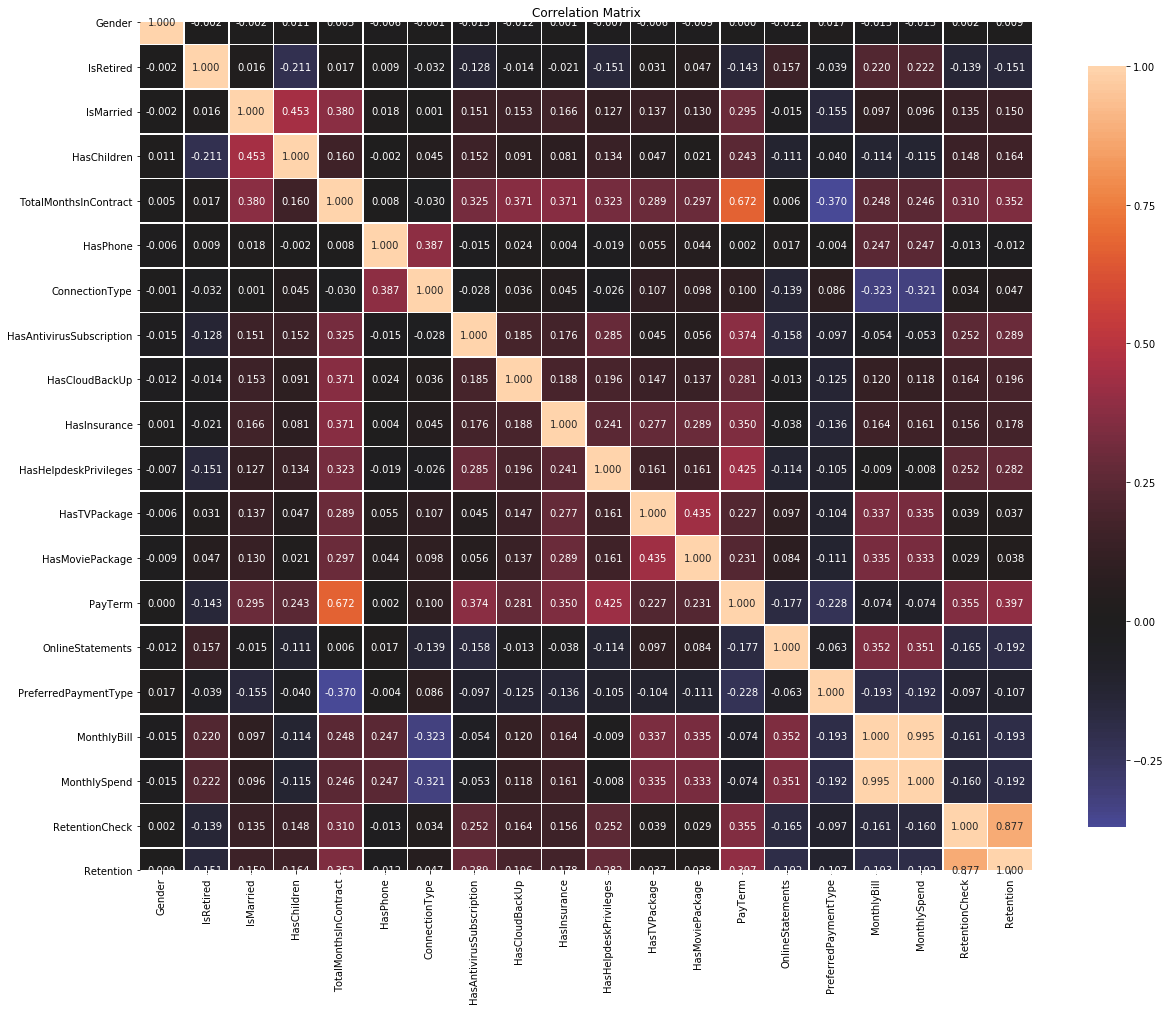

In [101]:
#Matrix correlation 
import matplotlib.pyplot as plt
import seaborn as sns

corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.3f',
square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.title('Correlation Matrix')
plt.show();

In [102]:
#Dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split

#X and y
y=df['Retention']
X=df.drop(columns='Retention')


#training and test set
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Building Models
## Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [104]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[316  57]
 [ 49 987]]


In [105]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.05 %
Standard Deviation: 1.11 %


In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       373
           1       0.95      0.95      0.95      1036

    accuracy                           0.92      1409
   macro avg       0.91      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409



In [107]:
#Checking AUC value
print('AUPRC = {}'.format(roc_auc_score(y_test, y_pred)))

AUPRC = 0.8999438446489385


## Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', random_state=0,n_estimators=100)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [109]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 336   37]
 [  27 1009]]


In [110]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.21 %
Standard Deviation: 0.58 %


### Applying Grid Search to find the best model and the best parameters

In [111]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion':['entropy','gini'],'min_samples_split':range(2,10),'n_estimators':range(50,250,50),'max_depth':range(5,20,1)}]
grid_search = RandomizedSearchCV(estimator = classifier,
                           param_distributions= parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 95.49 %
Best Parameters: {'n_estimators': 200, 'min_samples_split': 6, 'max_depth': 8, 'criterion': 'entropy'}


## RFC with best parameters

In [133]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', random_state=0,n_estimators=200,min_samples_split = 6,max_depth = 8)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [134]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 342   31]
 [  28 1008]]


In [135]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.49 %
Standard Deviation: 0.62 %


In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       373
           1       0.97      0.97      0.97      1036

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409



In [137]:
print('AUPRC = {}'.format(roc_auc_score(y_test, y_pred)))

AUPRC = 0.9449315267009636


## XGBoost

In [117]:
from xgboost.sklearn import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [118]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 342   31]
 [  28 1008]]


In [119]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.51 %
Standard Deviation: 0.67 %


## Grid search CV for XG Boost with best accuracy

In [120]:
param_grid = {'n_estimators': range(50,500,50),
                    'learning_rate': [ 0.1, 0.15,0.2,0.25],
                    'gamma':  [0.20,0.10, 0.15],
                    'max_delta_step': [24, 26, 22],
                    'max_depth':range(2,20),
             'min_child_weight': [1, 2, 3, 4]}       

ransearch = RandomizedSearchCV(classifier, n_iter = 50, param_distributions=param_grid, cv=10, n_jobs=-1, verbose=2)
ransearch = ransearch.fit(X_train,y_train)
best_accuracy = ransearch.best_score_
best_parameter = ransearch.best_params_
print('Accuracy: {:.2f}%'.format(best_accuracy*100))
print('parameter:',best_parameter)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.1min finished


Accuracy: 95.67%
parameter: {'n_estimators': 50, 'min_child_weight': 4, 'max_depth': 2, 'max_delta_step': 24, 'learning_rate': 0.1, 'gamma': 0.1}


In [127]:
# Running with best parameters
classifier = XGBClassifier(n_estimators=50,
 max_depth= 2,
 max_delta_step = 24,
 learning_rate = 0.1,
 gamma = 0.1,
min_child_weight = 4)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=24, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [128]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 345   28]
 [  32 1004]]


In [129]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       373
           1       0.97      0.97      0.97      1036

    accuracy                           0.96      1409
   macro avg       0.94      0.95      0.95      1409
weighted avg       0.96      0.96      0.96      1409



In [130]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.67 %
Standard Deviation: 0.57 %


In [131]:
#Checking AUC value
print('AUPRC = {}'.format(roc_auc_score(y_test, y_pred)))

AUPRC = 0.9470224724916413


## Feature Importance

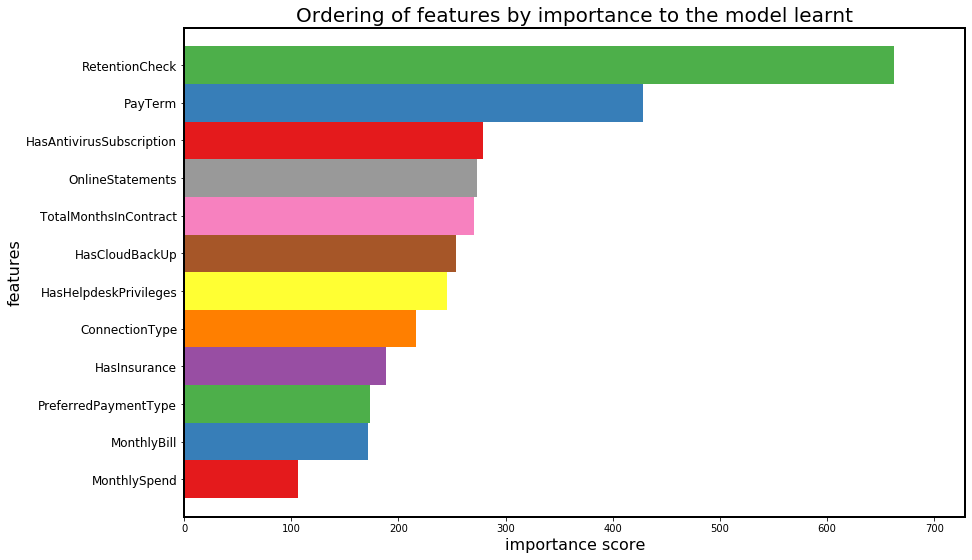

In [132]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(classifier, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);